In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from TransmissionMetricsProcessor_demo import TransmissionMetricsProcessor

import matplotlib.pyplot as plt


casepath=r'''C:\Qiuhua\FY2016_Project_Transactive_system\Simulation_Year1\TE_Challenge'''

colors = {0:'k', 1: 'b', 2:'r', 3: 'g',4: 'm',5:'y'}
time_interval_hours = 5/60;


casename = "TE_Challenge" # 'SGIP1a'
tmp = TransmissionMetricsProcessor()

tmp.loadAllMetricsFromJSONFiles(casename, casepath+"\\")

time_interval_hours = tmp.get_time_interval_hours()

all_bus_metrics = tmp.get_bus_metrics()
all_gen_metrics = tmp.get_gen_metrics()

print('bus metrics:\n',all_bus_metrics)



Generator Dictionary:
Unit Bus Type Pnom Pmax Costs[Start Stop C2 C1 C0]
1 1 swing 0.0 247.0 [ 500.0 0.0 0.03 1.3 180.0 ]
2 2 pv 163.0 192.0 [ 2000.0 0.0 0.085 3.0 100.0 ]
3 3 pv 85.0 128.0 [ 3000.0 0.0 0.122 5.0 135.0 ]
4 9 pq 0.0 250.0 [ 3000.0 0.0 3.0 50.0 1500.0 ]
There are 577 sample times at 300 second intervals
{'coal': [2074.2012999999997, 1.0090000000000001, 0.6053999999999999], 'gas_combinedcycle': [898.0036, 0.00767, 0.057525], 'gas_singlecycle': [1331.1996, 0.01137, 0.08527499999999999]}
genfuel type hydro  has zero emission.
bus metrics:
 <xarray.Dataset>
Dimensions:  (busNum: 1, time: 577)
Coordinates:
  * busNum   (busNum) int32 7
  * time     (time) float64 0.0 0.08333 0.1667 0.25 0.3333 0.4167 0.5 0.5833 ...
Data variables:
    LMP_P    (busNum, time) float64 0.01449 0.01665 0.01626 0.01613 0.0161 ...
    PD       (busNum, time) float64 100.0 150.4 140.8 139.1 138.8 139.0 ...
    VMAG     (busNum, time) float64 1.05 1.05 1.05 1.05 1.05 1.05 1.05 1.05 ...
Attributes:
 

In [4]:
## show how to slice the dataset 

all_bus_metrics.where(all_bus_metrics.time > 10,drop=True)



<xarray.Dataset>
Dimensions:  (busNum: 1, time: 456)
Coordinates:
  * busNum   (busNum) int32 7
  * time     (time) float64 10.08 10.17 10.25 10.33 10.42 10.5 10.58 10.67 ...
Data variables:
    LMP_P    (busNum, time) float64 0.02474 0.02608 0.02548 0.027 0.02573 ...
    PD       (busNum, time) float64 212.1 222.1 220.0 228.6 221.7 227.3 ...
    VMAG     (busNum, time) float64 1.05 1.05 1.05 1.05 1.05 1.05 1.05 1.05 ...
Attributes:
    bus_info_dict:  {'7': {'GLDsubstations': ['SUBSTATION7'], 'ampFactor': 40...

In [6]:
# convert to Pandas dataframe to interact with the rest of the PyData ecosystem
df = all_bus_metrics.to_dataframe()
df

LMP_P         PD      VMAG
busNum time                                    
7      0.000000   0.014493  100.00000  1.049998
       0.083333   0.016655  150.43260  1.049995
       0.166667   0.016256  140.79400  1.049997
       0.250000   0.016130  139.11644  1.049997
       0.333333   0.016102  138.77844  1.049997
       0.416667   0.016154  138.96244  1.049997
       0.500000   0.016335  144.99000  1.050000
       0.583333   0.016305  143.96600  1.050000
       0.666667   0.016340  144.07980  1.049997
       0.750000   0.016264  144.12980  1.050000
       0.833333   0.016250  143.07460  1.050000
       0.916667   0.016600  151.45700  1.049996
       1.000000   0.016282  145.05840  1.050000
       1.083333   0.016294  144.94940  1.050000
       1.166667   0.016328  145.00760  1.050000
       1.250000   0.016260  144.78460  1.050000
       1.333333   0.016249  144.41080  1.050000
       1.416667   0.015864  135.81204  1.049998
       1.500000   0.015834  135.88004  1.049998
       1.583333   0.015860  135.15204  1.049998
       1.666667   0.015825  135.07504  1.049998
       1.750000   0.015878  135.81404  1.049998
       1.833333   0.015865  135.60504  1.049998
       1.916667   0.015760  134.47424  1.049998
       2.000000   0.015791  134.40736  1.049998
       2.083333   0.015780  134.51936  1.049998
       2.166667   0.015828  136.60292  1.049998
       2.250000   0.015834  136.77704  1.049998
       2.333333   0.015746  134.83852  1.049998
       2.416667   0.015836  135.84280  1.049998
...                    ...        ...       ...
       45.583333  0.021482  178.67200  1.050000
       45.666667  0.020794  172.31280  1.050000
       45.750000  0.022309  187.73000  1.050000
       45.833333  0.020949  177.91720  1.050000
       45.916667  0.022342  191.94360  1.050000
       46.000000  0.022244  189.37640  1.050000
       46.083333  0.021925  189.43760  1.050000
       46.166667  0.021553  186.48880  1.050000
       46.250000  0.021446  185.52400  1.050000
       46.333333  0.020711  179.98320  1.050000
       46.416667  0.020490  178.65800  1.050000
       46.500000  0.019945  174.35240  1.049999
       46.583333  0.019529  170.80280  1.050000
       46.666667  0.019630  171.90000  1.050000
       46.750000  0.020558  182.12120  1.050000
       46.833333  0.019379  171.02800  1.050000
       46.916667  0.019708  176.50440  1.049999
       47.000000  0.019286  171.01040  1.050000
       47.083333  0.019924  179.08640  1.049999
       47.166667  0.019345  174.75120  1.050000
       47.250000  0.018938  169.99240  1.050000
       47.333333  0.018538  167.97840  1.049999
       47.416667  0.017962  162.27320  1.049999
       47.500000  0.018385  168.09600  1.049999
       47.583333  0.016690  149.41680  1.049999
       47.666667  0.016827  152.27600  1.049999
       47.750000  0.017827  162.34080  1.049999
       47.833333  0.016463  143.73240  1.049996
       47.916667  0.017406  159.01400  1.049999
       48.000000  0.018013  166.33400  1.049999

[577 rows x 3 columns]

In [9]:
## some common slicing methods have been provided

all_bus_metrics_nonEventDay = tmp.get_bus_metrics_for_period(0,24)

print("time range:",all_bus_metrics_nonEventDay.time.min().values, all_bus_metrics_nonEventDay.time.max().values)

time range: 0.0 23.916666666666668


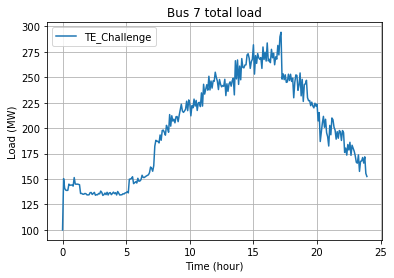

In [36]:
## plot some results

fig1=plt.figure()
ax1 = fig1.add_subplot(111)
plt.plot(all_bus_metrics_nonEventDay.sel(busNum = 7).time.values, all_bus_metrics_nonEventDay.sel(busNum = 7).PD.values,label=casename)

ax1.legend(loc='best')
ax1.grid(True)
ax1.set(title ='Bus 7 total load', xlabel='Time (hour)',ylabel='Load (MW)')


plt.show()


In [10]:
total_load_df = all_bus_metrics_nonEventDay.sel(busNum = 7).PD.to_dataframe()
total_load_df



,busNum,PD
time,,
0.000000,7,100.00000
0.083333,7,150.43260
0.166667,7,140.79400
0.250000,7,139.11644
0.333333,7,138.77844
0.416667,7,138.96244
0.500000,7,144.99000
0.583333,7,143.96600
0.666667,7,144.07980
